Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

 Description of fnlwgt (final weight)


 The weights on the CPS files are controlled to independent estimates of the
 civilian noninstitutional population of the US.  These are prepared monthly
 for us by Population Division here at the Census Bureau.  We use 3 sets of
 controls.

  These are:
          1.  A single cell estimate of the population 16+ for each state.
          2.  Controls for Hispanic Origin by age and sex.
          3.  Controls by Race, age and sex.

 We use all three sets of controls in our weighting program and "rake" through
 them 6 times so that by the end we come back to all the controls we used.

 The term estimate refers to population totals derived from CPS by creating
 "weighted tallies" of any specified socio-economic characteristics of the
 population.

 People with similar demographic characteristics should have
 similar weights.  There is one important caveat to remember
 about this statement.  That is that since the CPS sample is
 actually a collection of 51 state samples, each with its own
 probability of selection, the statement only applies within
 state.

http://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [52]:
from IPython.display import Markdown, display

import pandas as pd
import numpy as np

%matplotlib inline

In [53]:
df1 = pd.read_csv('adult.csv', skipinitialspace = True, na_values = ['?'], names = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 
                                                      'sex', 'capital_gain', 'capital_loss','hours_per_week','native_country', 'income'])

df2 = pd.read_csv('adult_test.csv', skipinitialspace = True, na_values = ['?'], names = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 
                                                      'sex', 'capital_gain', 'capital_loss','hours_per_week','native_country', 'income'])
dframes = [df1,df2]
df = pd.concat(dframes)
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [54]:
df.shape

(48842, 15)

In [55]:
df.isnull().values.any()

True

In [56]:
df= df.dropna()
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [57]:
d = {'Private': 1, 'Self-emp-not-inc': 2, 'Self-emp-inc': 3, 'Federal-gov': 4, 'Local-gov': 5, 'State-gov': 6, 'Without-pay': 7, 'Never-worked': 8}
df['workclass'] = df['workclass'].map(d)

#education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
d = {'Bachelors': 1, 'Some-college': 2, '11th': 3, 'HS-grad': 4, 'Prof-school': 5, 'Assoc-acdm': 6, 'Assoc-voc': 7, '9th': 8, '7th-8th': 9, '12th':10, 'Masters':11, '1st-4th':12, '10th':13 , 'Doctorate': 14, '5th-6th': 15, 'Preschool': 16}
df['education'] = df['education'].map(d)

# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
e = {'Married-civ-spouse': 1, 'Divorced': 2, 'Never-married': 3, 'Separated': 4, 'Widowed': 5, 'Married-spouse-absent': 6,
     'Married-AF-spouse': 7}
df['marital_status'] = df['marital_status'].map(e)

# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, 
# Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
d = {'Tech-support':1, 'Craft-repair':2, 'Other-service':3, 'Sales':4, 'Exec-managerial':5, 'Prof-specialty':6, 'Handlers-cleaners':7, 'Machine-op-inspct':8, 'Adm-clerical':9, 'Farming-fishing':10, 'Transport-moving':11, 'Priv-house-serv':12, 'Protective-serv':13, 'Armed-Forces':14}
df['occupation'] = df['occupation'].map(d)

# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
d = {'Wife': 1, 'Own-child': 2, 'Husband': 3, 'Not-in-family': 4, 'Other-relative': 5, 'Unmarried': 6}
df['relationship'] = df['relationship'].map(d)

# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
d = {'White': 1, 'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo': 3, 'Other': 4, 'Black': 5}
df['race'] = df['race'].map(d)

# sex: Female, Male.
d = {'Female': 1, 'Male': 2}
df['sex'] = df['sex'].map(d)

# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India,
#     Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, 
# Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, 
# Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
d = {'United-States':1, 'Cambodia':2, 'England':3, 'Puerto-Rico':4, 'Canada':5, 'Germany':6, 'Outlying-US(Guam-USVI-etc)':7, 'India':8,
'Japan':9, 'Greece':10, 'South':11, 'China':12, 'Cuba':13, 'Iran':14, 'Honduras':15, 'Philippines':16, 'Italy':17, 'Poland':18, 
'Jamaica':19, 'Vietnam':20, 'Mexico':21, 'Portugal':22, 
'Ireland':23, 'France':24, 'Dominican-Republic':25, 'Laos':26, 'Ecuador':27, 'Taiwan':28, 'Haiti':29, 'Columbia':30,
     'Hungary':31, 'Guatemala':32, 'Nicaragua':33, 'Scotland':34, 
'Thailand':35, 'Yugoslavia':36, 'El-Salvador':37, 'Trinadad&Tobago':38, 'Peru':39, 'Hong':40, 'Holand-Netherlands':41}
df['native_country'] = df['native_country'].map(d)

d = {'<=50K': 0, '>50K': 1}
df['income'] = df['income'].map(d)

df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,1,13,3,9,4,1,2,2174,0,40,1,0.0
1,50,2,83311,1,13,1,5,3,1,2,0,0,13,1,0.0
2,38,1,215646,4,9,2,7,4,1,2,0,0,40,1,0.0
3,53,1,234721,3,7,1,7,3,5,2,0,0,40,1,0.0
4,28,1,338409,1,13,1,6,1,5,1,0,0,40,13,0.0
5,37,1,284582,11,14,1,5,1,1,1,0,0,40,1,0.0
6,49,1,160187,8,5,6,3,4,5,1,0,0,16,19,0.0
7,52,2,209642,4,9,1,5,3,1,2,0,0,45,1,1.0
8,31,1,45781,11,14,3,6,4,1,1,14084,0,50,1,1.0
9,42,1,159449,1,13,1,5,3,1,2,5178,0,40,1,1.0


In [58]:
df= df.dropna()

In [59]:
df.isnull().values.any()

False

In [60]:
df.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.736788,1.897938e+05,4.372820,10.121312,2.053213,5.742159,3.393276,1.445196,1.675685,1092.007858,88.372489,40.931238,2.515583,0.248922
std,13.134665,1.461908,1.056530e+05,3.429379,2.549995,1.170881,2.978754,1.229789,1.196958,0.468126,7406.346497,404.298370,11.979984,5.641075,0.432396
min,17.000000,1.000000,1.376900e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,28.000000,1.000000,1.176272e+05,2.000000,9.000000,1.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,40.000000,1.000000,0.000000
50%,37.000000,1.000000,1.784250e+05,4.000000,10.000000,2.000000,5.000000,3.000000,1.000000,2.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,5.000000,13.000000,3.000000,8.000000,4.000000,1.000000,2.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,7.000000,1.484705e+06,16.000000,16.000000,7.000000,14.000000,6.000000,5.000000,2.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [61]:

#here resetting all the features to the original list of  features
all_features = df[['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 
                                                      'sex', 'capital_gain', 'capital_loss','hours_per_week','native_country']].values


all_classes = df['income'].values

feature_names = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 
                                                      'sex', 'capital_gain', 'capital_loss','hours_per_week','native_country']

all_features

array([[    39,      6,  77516, ...,      0,     40,      1],
       [    50,      2,  83311, ...,      0,     13,      1],
       [    38,      1, 215646, ...,      0,     40,      1],
       ...,
       [    58,      1, 151910, ...,      0,     40,      1],
       [    22,      1, 201490, ...,      0,     20,      1],
       [    52,      3, 287927, ...,      0,     40,      1]], dtype=int64)

In [62]:
# !pip install mlrose

In [63]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



array([[ 0.04279571,  2.91624496, -1.0627216 , ..., -0.21858598,
        -0.07773411, -0.26867354],
       [ 0.88028814,  0.18004984, -1.00787131, ..., -0.21858598,
        -2.3315307 , -0.26867354],
       [-0.03333996, -0.50399894,  0.24469349, ..., -0.21858598,
        -0.07773411, -0.26867354],
       ...,
       [ 1.48937355, -0.50399894, -0.3585745 , ..., -0.21858598,
        -0.07773411, -0.26867354],
       [-1.25151078, -0.50399894,  0.11070545, ..., -0.21858598,
        -1.74721307, -0.26867354],
       [ 1.0325595 ,  0.86409862,  0.92884082, ..., -0.21858598,
        -0.07773411, -0.26867354]])

In [64]:
from sklearn.tree import DecisionTreeClassifier
import numpy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation
from sklearn import tree


(X_train,
 X_test,
 y_train,
 y_test) = cross_validation.train_test_split(all_features_scaled, all_classes, train_size=0.80, random_state=0)

In [65]:
# from sklearn.ensemble import RandomForestClassifier
# feat_labels = df.columns[1:]
# forest = RandomForestClassifier(n_estimators= 10000,
#                                random_state =0,
#                                n_jobs= -1)
# forest.fit(X_train, y_train)
# importances = forest.feature_importances_ 
# indices= np.argsort(importances)[::-1]
# for f in range(X_train.shape[1]):
#     print("2%d) %-*s %f" %(f+1,30, feat_labels[f], importances[indices[f]]))

C:\Users\maria\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



21) workclass                      0.170018
22) fnlwgt                         0.155541
23) education                      0.118800
24) education_num                  0.112054
25) marital_status                 0.093251
26) occupation                     0.082209
27) relationship                   0.072509
28) race                           0.051886
29) sex                            0.035420
210) capital_gain                   0.034373
211) capital_loss                   0.031412
212) hours_per_week                 0.015382
213) native_country                 0.014382
214) income                         0.012764


21) workclass                      0.170018  
22) fnlwgt                         0.155541  
23) education                      0.118800  
24) education_num                  0.112054  
25) marital_status                 0.093251  
26) occupation                     0.082209  
27) relationship                   0.072509  
28) race                           0.051886  
29) sex                            0.035420  
210) capital_gain                   0.034373  
211) capital_loss                   0.031412  
212) hours_per_week                 0.015382  
213) native_country                 0.014382  
214) income                         0.012764  

## Expectation Maximization


In [66]:
from sklearn import mixture

In [67]:
df = df.reset_index()
df.head()

,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,39,6,77516,1,13,3,9,4,1,2,2174,0,40,1,0.0
1,1,50,2,83311,1,13,1,5,3,1,2,0,0,13,1,0.0
2,2,38,1,215646,4,9,2,7,4,1,2,0,0,40,1,0.0
3,3,53,1,234721,3,7,1,7,3,5,2,0,0,40,1,0.0
4,4,28,1,338409,1,13,1,6,1,5,1,0,0,40,13,0.0


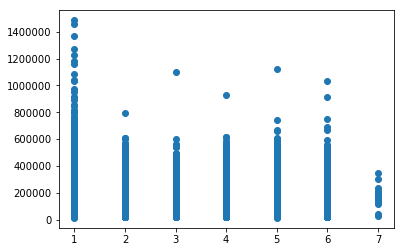

In [68]:
# https://stackoverflow.com/questions/43386493/what-is-the-correct-way-to-fit-a-gaussian-mixture-model-to-single-feature-data
# https://www.geeksforgeeks.org/gaussian-mixture-model/
g = mixture.GaussianMixture(n_components=4, covariance_type='full')
g.fit(df)

plt.scatter( df['workclass'],df['fnlwgt'])
#df['cap_shape'],df['cap_surface'], df['cap_color'],df['bruises'], df['odor'], df['gill_attachment']



In [69]:
df = pd.DataFrame(df) 

g = mixture.GaussianMixture(n_components=4, covariance_type='full')
g.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [70]:
labels = g.predict(df) 
df['labels']= labels 

In [71]:
d0 = df[df['labels']== 0] 
d1 = df[df['labels']== 1] 
d2 = df[df['labels']== 2] 
d3 = df[df['labels']== 3]
d4 = df[df['labels']== 4] 
d5 = df[df['labels']== 5] 
d6 = df[df['labels']== 6]

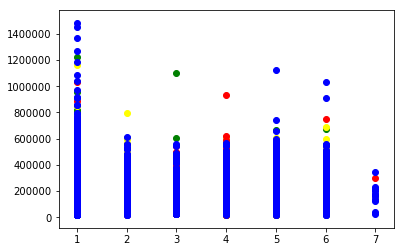

In [72]:
# plot three clusters in same plot 
plt.scatter(d0['workclass'], d0['fnlwgt'], c ='green') 
plt.scatter(d1['workclass'], d1['fnlwgt'], c ='yellow') 
plt.scatter(d2['workclass'], d2['fnlwgt'], c ='red')
plt.scatter(d3['workclass'], d3['fnlwgt'], c ='blue')
plt.scatter(d4['workclass'], d4['fnlwgt'], c ='grey') 
plt.scatter(d5['workclass'], d5['fnlwgt'], c ='pink')
plt.scatter(d6['workclass'], d6['fnlwgt'], c ='brown')

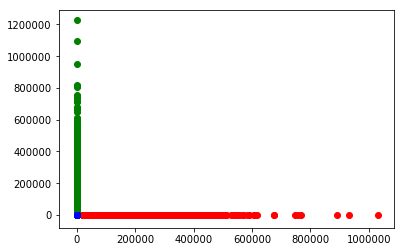

In [73]:
# plot three clusters in same plot 
plt.scatter(d0['workclass'], d0['fnlwgt'], c ='green') 
plt.scatter(d1['workclass'], d1['education'], c ='yellow') 
plt.scatter(d2['fnlwgt'], d2['education'], c ='red')
plt.scatter(d3['education_num'], d3['workclass'], c ='blue')
plt.scatter(d4['marital_status'], d4['workclass'], c ='grey') 
plt.scatter(d5['workclass'], d5['occupation'], c ='pink')
plt.scatter(d6['occupation'], d6['fnlwgt'], c ='brown')

In [74]:
# print the converged log-likelihood value 
print(g.lower_bound_) 


-30.571303321321526


In [75]:
# print the number of iterations needed 
# for the log-likelihood value to converge 
print(g.n_iter_)

15
